### Import Libraries

In [1]:
# Basic Python Modules
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Deep Learning Libraries
import tensorflow as tf
from tensorflow.python.client import device_lib

warnings.filterwarnings("ignore")
%matplotlib inline

<!--  -->

### Tensorflow Configuration Details

In [2]:
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2611816600455507392
 xla_global_id: -1]

Observation
- TF is connected to CPU, because we are installed TF CPU version.

<!--  -->

### Network Parameters

In [3]:
n_hidden_layer_1 = 10 # 1st hidden layer's number of neurons
n_hidden_layer_2 = 5 # 2nd hidden layer's number of neurons
n_input = 784 # MNIST data input (img shape: 28*28)
n_output_layer_classes = 10 # MNIST total classes (0-9 digits)

<!--  -->

### Weights Initialization

- **Xavier (Glorot) Normal initialization for Using: Sigmoid and Tanh Activational Units**

In [4]:
# # Assign weights on each layer
# weights_xavier = {
#     "h1": tf.Variable(tf.random.normal([n_input, n_hidden_layer_1], stddev=np.sqrt(2.0 / (n_input + n_hidden_layer_1)), mean=0)),
#     "h2": tf.Variable(tf.random.normal([n_hidden_layer_1, n_hidden_layer_2], stddev=np.sqrt(2.0 / (n_hidden_layer_1 + n_hidden_layer_2)), mean=0)),
#     "out": tf.Variable(tf.random.normal([n_hidden_layer_2, n_output_layer_classes], stddev=np.sqrt(2.0 / (n_hidden_layer_2 + n_output_layer_classes)), mean=0))
# }

In [5]:
# Xavier (Glorot) Normal initialization for Sigmoid and Tanh
def xavier_init(n_in, n_out):
    stddev = np.sqrt(2.0 / (n_in + n_out))
    return tf.random.normal([n_in, n_out], stddev=stddev, mean=0)

weights_xavier = {
    'h1': tf.Variable(xavier_init(n_input, n_hidden_layer_1)),
    'h2': tf.Variable(xavier_init(n_hidden_layer_1, n_hidden_layer_2)),
    'out': tf.Variable(xavier_init(n_hidden_layer_2, n_output_layer_classes))
}

In [6]:
weights_xavier

{'h1': <tf.Variable 'Variable:0' shape=(784, 10) dtype=float32, numpy=
 array([[ 0.08837537,  0.01164463, -0.00366665, ..., -0.01713743,
         -0.02003113, -0.00438247],
        [ 0.0052031 ,  0.00767701, -0.00776715, ..., -0.01021305,
          0.02701942,  0.00524187],
        [ 0.00177982,  0.00637453, -0.05073169, ..., -0.00435358,
         -0.08578835, -0.00129906],
        ...,
        [ 0.02015848,  0.00532743,  0.00258217, ..., -0.01012593,
          0.00621129,  0.02168704],
        [-0.00811224,  0.01058017,  0.01846192, ..., -0.05336038,
          0.01546121, -0.02599402],
        [-0.00296782,  0.00760117,  0.0119552 , ...,  0.02785732,
         -0.04741203, -0.03174415]], dtype=float32)>,
 'h2': <tf.Variable 'Variable:0' shape=(10, 5) dtype=float32, numpy=
 array([[ 8.78186710e-03, -1.62346825e-01, -5.95714033e-01,
         -4.19286877e-01,  1.46893710e-01],
        [-4.47796643e-01,  3.52986723e-01, -8.08599778e-03,
          4.16699052e-02,  3.56301874e-01],
        [

- **He Normal initialization for Using ReLU Activational Units**

In [7]:
# weights_he = {
#     "h1": tf.Variable(tf.random.normal([n_input, n_hidden_layer_1], stddev=np.sqrt(2.0 / n_input), mean=0)),
#     "h2": tf.Variable(tf.random.normal([n_hidden_layer_1, n_hidden_layer_2], stddev=np.sqrt(2.0 / n_hidden_layer_1), mean=0)),
#     "out": tf.Variable(tf.random.normal([n_hidden_layer_2, n_output_layer_classes], stddev=np.sqrt(2.0 / n_hidden_layer_2), mean=0)),
#     }

In [8]:
# He Normal initialization for ReLU
def he_init(n_in, n_out):
    stddev = np.sqrt(2.0 / n_in)
    return tf.random.normal([n_in, n_out], stddev=stddev, mean=0)

weights_he = {
    'h1': tf.Variable(he_init(n_input, n_hidden_layer_1)),
    'h2': tf.Variable(he_init(n_hidden_layer_1, n_hidden_layer_2)),
    'out': tf.Variable(he_init(n_hidden_layer_2, n_output_layer_classes))
}

In [9]:
weights_he

{'h1': <tf.Variable 'Variable:0' shape=(784, 10) dtype=float32, numpy=
 array([[-0.05689668,  0.01038874, -0.02313792, ..., -0.01377144,
         -0.02371688,  0.0156901 ],
        [ 0.02759313, -0.02594051,  0.00623593, ...,  0.08308317,
         -0.02142936,  0.03964444],
        [-0.02491081, -0.02598529, -0.01424137, ..., -0.12548696,
         -0.02176876, -0.06123509],
        ...,
        [ 0.03022522, -0.06680357,  0.03088242, ...,  0.00089388,
         -0.02324224, -0.05138081],
        [-0.00211316,  0.00929494, -0.13864131, ..., -0.00489479,
         -0.01420209,  0.10126542],
        [ 0.10773855,  0.04820438,  0.18508077, ..., -0.06727341,
          0.00742946, -0.04063138]], dtype=float32)>,
 'h2': <tf.Variable 'Variable:0' shape=(10, 5) dtype=float32, numpy=
 array([[ 0.09673207,  0.17531791, -0.04468851,  0.3765119 , -0.263445  ],
        [-0.22563942, -0.72833383,  0.0822366 ,  0.16398837, -0.05574333],
        [-0.583451  , -1.3301508 , -0.42878503, -0.56569475, -0.020

In [10]:
# Bias common for all types of activation
biases = {
    "b1": tf.Variable(tf.random.normal([n_hidden_layer_1])),
    "b2": tf.Variable(tf.random.normal([n_hidden_layer_2])),
    "out": tf.Variable(tf.random.normal([n_output_layer_classes]))
}

In [11]:
biases

{'b1': <tf.Variable 'Variable:0' shape=(10,) dtype=float32, numpy=
 array([-0.03347822,  1.0492674 , -0.39898208,  0.87326884, -0.53338623,
         0.3437759 , -0.5226531 , -0.48354945, -0.27504125,  0.05496972],
       dtype=float32)>,
 'b2': <tf.Variable 'Variable:0' shape=(5,) dtype=float32, numpy=
 array([ 0.43124104,  1.9451619 ,  0.31968018, -0.85029   ,  0.13506207],
       dtype=float32)>,
 'out': <tf.Variable 'Variable:0' shape=(10,) dtype=float32, numpy=
 array([ 0.8900562 ,  2.6121035 ,  0.21787214,  0.21537663,  1.1766813 ,
        -0.29439306,  1.4670229 ,  1.1227189 , -1.0013113 , -1.5223153 ],
       dtype=float32)>}

<!--  -->

### Sample Data

In [12]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist

- Train and Test Splits

In [13]:
(X_train_images, y_train_labels), (X_test_images, y_test_labels) = mnist.load_data()

In [14]:
print(f"Train Images: {X_train_images.shape[0]}, Train Rows: {X_train_images.shape[1]}, Train Columns: {X_train_images.shape[1]}")
print(f"Train Labels: {y_train_labels.shape[0]}")

print(f"Test Images: {X_test_images.shape[0]}, Test Rows: {X_test_images.shape[1]}, Test Columns: {X_test_images.shape[1]}")
print(f"Test Labels: {y_test_labels.shape[0]}")

Train Images: 60000, Train Rows: 28, Train Columns: 28
Train Labels: 60000
Test Images: 10000, Test Rows: 28, Test Columns: 28
Test Labels: 10000


- Sample First 2 Images

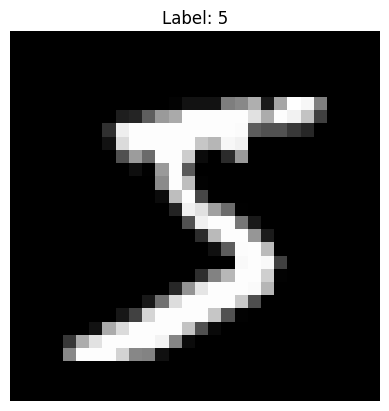

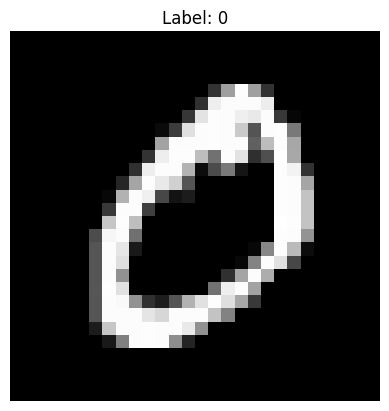

In [16]:
# Function to plot an image
def plot_image(image, label):
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()

# Plotting the first image from the training set
plot_image(X_train_images[0], y_train_labels[0])
plot_image(X_train_images[1], y_train_labels[1])

In [15]:
X_train_images[:1]

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,
           0,   0,   0

<!--  -->

### Flattening Images : 28 * 28 matrix repesentation to 1D array

Note: Dimensions Reducing For NN Training

- Neural networks, especially fully connected layers, expect input data in a flat, 1D format. Since MNIST images are originally 28x28 pixels, they need to be flattened into a single vector with 784 elements before being fed into the network.

In [16]:
X_train_images = X_train_images.reshape([-1, 28*28]).astype(np.float32)
X_test_images = X_test_images.reshape([-1, 28*28]).astype(np.float32)

- Train Data

In [17]:
# Train Data Overview
print(f'Train predictors data shape: {X_train_images.shape}')
print(f'Test target data shape: {y_train_labels.shape}')


Train predictors data shape: (60000, 784)
Test target data shape: (60000,)


In [18]:
X_train_images[:1]

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

In [19]:
y_train_labels[:1]

array([5], dtype=uint8)

- Test Data

In [20]:
# Test Data Overview
print(f'Test predictors shape: {X_test_images.shape}')
print(f'Test target shape: {y_test_labels.shape}')

Test predictors shape: (10000, 784)
Test target shape: (10000,)


In [21]:
X_test_images[:1]

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

In [22]:
y_test_labels[:1]

array([7], dtype=uint8)

<!--  -->

### Normalization

In [23]:
# Normalize the images to the range of [0, 1]
X_train_images = X_train_images / 255.0
X_test_images = X_test_images / 255.0

In [24]:
X_train_images[:1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

<!--  -->

<!--  -->

### One-hot Encoding : Target Variable

In [25]:
y_train_labels = tf.keras.utils.to_categorical(y_train_labels, num_classes=10).astype(np.float32)
y_test_labels = tf.keras.utils.to_categorical(y_test_labels, num_classes=10).astype(np.float32)

In [26]:
y_train_labels[:1] # 5

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [27]:
y_test_labels[:1] # 7

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

<!--  -->

### TensorFlow DataSet

In [28]:
train_dataset = tf.data.Dataset\
                .from_tensor_slices((X_train_images, y_train_labels))\
                .shuffle(60000)\
                .batch(100)

test_dataset = tf.data.Dataset\
                .from_tensor_slices((X_test_images, y_test_labels))\
                .batch(100)

<!-- ' -->

### Model Definition : Construct Network

```text
784 inputs --> 
    hidden layer1 (20 neuros): activation func sigmoid/tanh/relu --> 
        hidden layer2 (10 Neuros): activation func sigmoid/tanh/relu --> 
            output: activation func softmax -->
                predictions classes [0-9] with probability's
```

In [29]:
def Model(x, weights, biases, activation): # x is predictors / columns / features of images data
    # Hidden Layer 1
    layer_1 = tf.add(tf.matmul(x, weights["h1"]), biases["b1"]) # i.e., Matrix multiplication ex:- y= mx + c

    if activation == "sigmoid":
        layer_1 = tf.nn.sigmoid(layer_1)
    elif activation == "tanh":
        layer_1 = tf.nn.tanh(layer_1)
    elif activation == "relu":
        layer_1 = tf.nn.relu(layer_1)

    # Hidden Layer 2
    layer_2 = tf.add(tf.matmul(layer_1, weights["h2"]), biases["b2"]) # i.e., Matrix multiplication ex:- y= mx + c

    if activation == "sigmoid":
        layer_2 = tf.nn.sigmoid(layer_2)
    elif activation == "tanh":
        layer_2 = tf.nn.tanh(layer_2)
    elif activation == "relu":
        layer_2 = tf.nn.relu(layer_2)

    # Output Layer
    out_layer = tf.add(tf.matmul(layer_2, weights["out"]), biases["out"]) # i.e., Matrix multiplication ex:- y= mx + c 

    return tf.nn.softmax(out_layer)

<!--  -->

### Traing Step: Loss Calculation and Weight Updation

**Weights Updation**

Both snippets perform the same basic operation: they update the model's weights and biases using the calculated gradients.

The first approach utilizes the apply_gradients method provided by the optimizer, which abstracts the details of the update process.

```python
grads = tape.gradient(loss_value, [W, b])
```

The second approach manually performs the update using basic TensorFlow operations.
```python
for g,v in zip(grads, model.variables):
    v.assign_sub(learning_rate * g)
```

In [30]:
# def train_step(model, optimizer, loss_func, images, labels):
def train_step(images, labels, model_func, optimizer, loss_func):
    with tf.GradientTape() as tape:
        # predictions = model(images) # model already have all other arguments given, now only columns/features of images being passed
        predictions = model_func(images)
        loss_value = loss_func(labels, predictions)
    # grads = tape.gradient(loss_value, model.trainable_variables)
    # optimizer.apply_gradients(zip(grads, model.trainable_variables))
    grads = tape.gradient(loss_value, [*weights.values(), *biases.values()])
    optimizer.apply_gradients(zip(grads, [*weights.values(), *biases.values()]))    
    return loss_value


<!--  -->

### Model Training

In [31]:
def train_model(weights, biases, activation, optimizer, train_dataset, num_epochs):
    loss_func = tf.keras.losses.CategoricalCrossentropy()
    losses = []

    for epoch in range(num_epochs):
        epoch_loss_avg = tf.keras.metrics.Mean()
        for images, labels in train_dataset:
            # Here lamda x is just notation of a argument i.e., columns/features of images, which will be passed during train step
            # loss = train_step(lambda x: Model(x, weights, biases, activation), optimizer, loss_func, images, labels)
            # or
            # loss = train_step(Model(images, weights, biases, activation), optimizer, loss_func, images, labels)
            model_func = lambda x: Model(x, weights, biases, activation)
            loss = train_step(images, labels, model_func, optimizer, loss_func)            
            epoch_loss_avg.update_state(loss) # Loss mean as per batch
        losses.append(epoch_loss_avg.result().numpy())
        if (epoch + 1) % 5 == 0:
            print(f"Epoch {epoch + 1}, Loss: {epoch_loss_avg.result().numpy()}")

    return losses

<!--  -->

### Model Accuracy

In [32]:
def model_accuracy(weights, biases, activation, test_dataset):
    accuracy_metric = tf.keras.metrics.CategoricalAccuracy()
    for images, labels in test_dataset:
        predictions = Model(images, weights, biases, activation)
        accuracy_metric.update_state(labels, predictions)
    return accuracy_metric.result().numpy()

<!--  -->

### Plot Loss

In [33]:
def plot_loss(num_epochs, losses, title):
    sns.set_style("dark")
    plt.plot(range(1, num_epochs + 1), losses, 'b', label='Train Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.show()

<!--  -->

### Model Hyperparameters

In [36]:
num_epochs = 10
activations = ["sigmoid", "tanh", "relu"]
optimizer_constructors = {
    "SGD": lambda: tf.optimizers.SGD(learning_rate=0.05)
}

<!--  -->

### Start Training

Training Model with sigmoid activation and SGD optimizer....
Epoch 5, Loss: 1.3663338422775269
Epoch 10, Loss: 0.7588478326797485


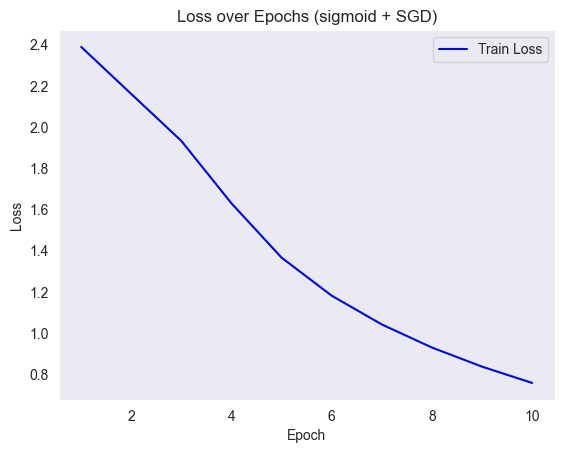

Test Accuracy with activation name: sigmoid and optimizer: SGD -->  0.84
Training Model with tanh activation and SGD optimizer....
Epoch 5, Loss: 0.4632144272327423
Epoch 10, Loss: 0.3679613173007965


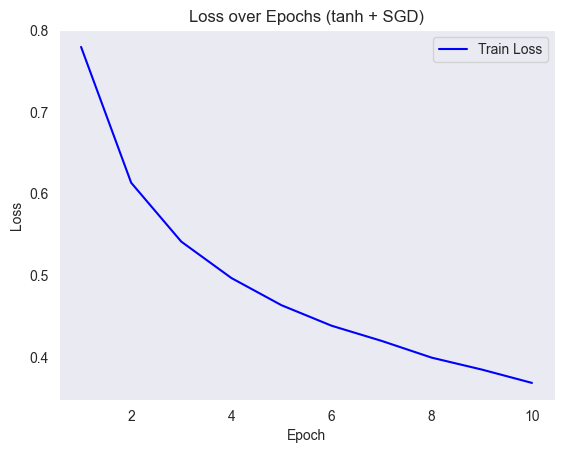

Test Accuracy with activation name: tanh and optimizer: SGD -->  0.90
Training Model with relu activation and SGD optimizer....
Epoch 5, Loss: 0.3888346552848816
Epoch 10, Loss: 0.32263848185539246


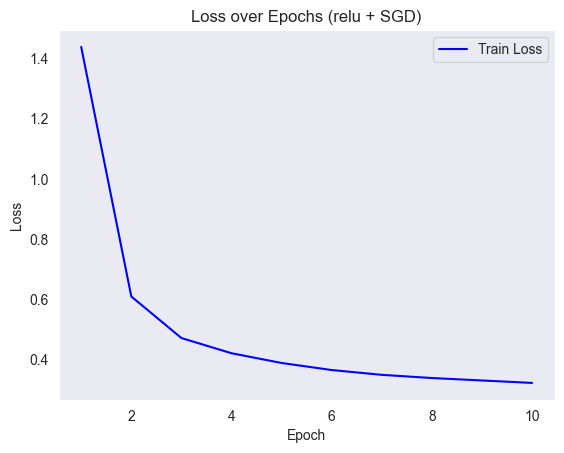

Test Accuracy with activation name: relu and optimizer: SGD -->  0.90


In [38]:
for activation in activations:
    for opt_name, opt_constructor in optimizer_constructors.items():
        if activation == "relu":
            weights = weights_he
        else:
            weights = weights_xavier
        optimizer = opt_constructor()  # Create a new optimizer instance
        # When opt_constructor() is called, it executes the lambda function, which creates and returns a new tf.optimizers.SGD instance with the specified learning rate.
        print(f"Training Model with {activation} activation and {opt_name} optimizer....")
        losses = train_model(weights, biases, activation, optimizer, train_dataset, num_epochs)
        plot_loss(num_epochs, losses, f"Loss over Epochs ({activation} + {opt_name})")
        test_accuracy = model_accuracy(weights, biases, activation, test_dataset)
        print(f"Test Accuracy with activation name: {activation} and optimizer: {opt_name} --> {test_accuracy: .2f}")

### Observations

- Out of all combinations tanh / relU with SGD seems to be better parameters with less epochs and minor deep learning model.
- We can also add more optimizers i.e., Adam and can also increase hidden layers along with higher neurons in each network.